<a href="https://colab.research.google.com/github/Rishav-hub/Auto-ViML/blob/main/05_AutoVIML_for_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installation
```pip install git+https://github.com/AutoViML/Auto_ViML.git```

or 

```pip install autoviml```

In [1]:
!pip install autoviml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 9.1 MB/s 
     |████████████████████████████████| 175 kB 62.6 MB/s 
     |████████████████████████████████| 268 kB 54.3 MB/s 
     |████████████████████████████████| 192.9 MB 58 kB/s 
     |████████████████████████████████| 76.6 MB 92 kB/s 
     |████████████████████████████████| 569 kB 70.6 MB/s 
     |████████████████████████████████| 125 kB 72.4 MB/s 
     |████████████████████████████████| 11.2 MB 54.7 MB/s 
     |████████████████████████████████| 930 kB 74.3 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=0c1b2a8df702d814458684aa69b885288d2fe8cb64e79b8477b8381ede704bc4
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalli

## Implementation with Auto-ViML

In [14]:
from autoviml.Auto_NLP import Auto_NLP

## Load Dataset

In [2]:
import tensorflow_datasets as tfds
dataset, info = tfds.load('amazon_us_reviews/Personal_Care_Appliances_v1_00', with_info=True, batch_size=-1)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/amazon_us_reviews/Personal_Care_Appliances_v1_00/0.1.0.incompleteHBRPOI/amazon_us_reviews-train.tfrecord


  0%|          | 0/85981 [00:00<?, ? examples/s]

Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Personal_Care_Appliances_v1_00/0.1.0. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [3]:
train_dataset = dataset['train']

## Convert dataset to array


In [4]:
import numpy as np
dataset=tfds.as_numpy(train_dataset)

In [ ]:
dataset

## Extracting important columns

The dataset has different columns. We are interested in the following columns: helpful_votes, review_headline, review_body and star_rating.

- star_rating: It shows the 1-5 star rating of the product purchased.

- helpful_votes: It shows the number of votes for a purchased product.

- review_headline: It shows the title product review.

- review_body: It shows a detailed description of the review.

In [6]:
helpful_votes=dataset['data']['helpful_votes']
review_headline=dataset['data']['review_headline']
review_body=dataset['data']['review_body']
rating=dataset['data']['star_rating']

## Creating a data frame

In [7]:
import pandas as pd
reviews_df=pd.DataFrame(np.hstack((helpful_votes[:,None],review_headline[:,None],review_body[:,None],rating[:,None])),columns=['votes','headline','reviews','rating'])


In [9]:
# Define Datatypes Columns datatypes

convert_dict = {'votes': int, 
 'headline': str,
 'reviews': str,
 'rating': int
               }
reviews_df = reviews_df.astype(convert_dict) 


In [10]:
reviews_df

,votes,headline,reviews,rating
0,0,b'These glasses are an excellent value. The fit is good and they are ...',"b""These glasses are an excellent value. The fit is good and they are very comfortable. Because of my legal blindness, there aren't a lot of options to try to see better, but I believe these help with my other visual aids, and because they are reasonably priced I can have more than one pair available.""",4
1,3,b'A fantastic way to cheaply try straight razor shaving.',"b""Always wanted to try straight razor shaving (as a DE safety razor user), and this was a cheap way for me to determine I was not into it.<br /><br />Because the blades are disposable and always sharp, I could put a new one in and reasonably rely upon that fact that cuts were probably due to my technique and not the blade.<br /><br />It's very hard to do straight razor shaving on yourself because the ANGLE is difficult to control without switching hands. Being very right-handed, I really couldn't do that. I bet I could shave someone else's face with it though.<br /><br />An immediate upside? Using a DE safety razor (slant edged even) seems SUPER safe now! I'm increased my speed with the DE due to that confidence, and I'd been using it for years now.""",5
2,0,b'Great for travel',"b'I usually either throw my toothbrush in a plastic bag with spare head so this product is very convenient for keeping all the parts apart, dry and undamaged, and i now keep it in my travel bag all the time ready to go.'",4
3,0,b'Five Stars',b'Top quality.',5
4,1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance AlkaMAX alkaline booster liquid unflavored (formally TriMedica) a glass brown bottle with eye dropper.<br />Supplement Facts; Serving Size: 10 Drops (Approx. 0.5 mL). Servings per Container: Approx. 60<br />Amount Per Serving % Daily Value<br />Magnesium (as Magnesium Chloride) 40 mg 10%<br />Chloride (as Magnesium Chloride) 64 mg 2%<br />Other Ingredients: Deionized water and trace mineral complex.<br />Directions: Add 10 drops to 8 oz. of water or other beverage daily as needed or as directed by your health care practitioner. Store in a cool, dry place.<br /><br />I have not used product as of yet with changed ingredients of original/as shown in AlkaMax alkaline support white squeeze bottle.<br />but had to rate to post...heck this new may be better for all I know.'",3
...,...,...,...,...
85976,2,b'YES!',"b""This is the real deal. Don't bother with the $20-30 hair cutters and the junky plastic attachments. But the professional Oster and the attachments you need. You'll still save a fortune over pro haircuts, but the cheap models don't work nearly as neatly or quickly.""",5
85977,1,b'Bryton Picks',b'I like the Bryton Picks very much. Have ordered these unusual picks before and will again when the need arises. They work amazingly well.',5
85978,0,b'Trimmer Not Working',"b""I have had a Remington before but needed a new one when the batteries died and the cutters were all but gone. It was cheaper to buy a new one. The new one has a nice charge level but the trimmer didn't work when I got it.""",3
85979,0,b'Loud and ineffectual',"b""I was surprised that it really didn't do much compared to the 1950s version that I'd inherited. Keeping a wet wash cloth next to my bed for when I start coughing in the middle of the night works better.""",2


## Adding the target column
For a review to be positive, the star_rating should be greater than 4. If the star_rating is less than 4, the review is negative.

This code will add the target column. It will ensure that if the rating is greater than 4, the review is labeled 1. If the rating is less than 4, the review is labeled 0.

In [11]:
reviews_df["target"] = reviews_df["rating"].apply(lambda x: 1 if x>= 4 else 0) 

In [12]:
reviews_df

,votes,headline,reviews,rating,target
0,0,b'These glasses are an excellent value. The fit is good and they are ...',"b""These glasses are an excellent value. The fit is good and they are very comfortable. Because of my legal blindness, there aren't a lot of options to try to see better, but I believe these help with my other visual aids, and because they are reasonably priced I can have more than one pair available.""",4,1
1,3,b'A fantastic way to cheaply try straight razor shaving.',"b""Always wanted to try straight razor shaving (as a DE safety razor user), and this was a cheap way for me to determine I was not into it.<br /><br />Because the blades are disposable and always sharp, I could put a new one in and reasonably rely upon that fact that cuts were probably due to my technique and not the blade.<br /><br />It's very hard to do straight razor shaving on yourself because the ANGLE is difficult to control without switching hands. Being very right-handed, I really couldn't do that. I bet I could shave someone else's face with it though.<br /><br />An immediate upside? Using a DE safety razor (slant edged even) seems SUPER safe now! I'm increased my speed with the DE due to that confidence, and I'd been using it for years now.""",5,1
2,0,b'Great for travel',"b'I usually either throw my toothbrush in a plastic bag with spare head so this product is very convenient for keeping all the parts apart, dry and undamaged, and i now keep it in my travel bag all the time ready to go.'",4,1
3,0,b'Five Stars',b'Top quality.',5,1
4,1,b'*Product sent not as shown',"b'Today I received 1 Fl. Oz, Natures Balance AlkaMAX alkaline booster liquid unflavored (formally TriMedica) a glass brown bottle with eye dropper.<br />Supplement Facts; Serving Size: 10 Drops (Approx. 0.5 mL). Servings per Container: Approx. 60<br />Amount Per Serving % Daily Value<br />Magnesium (as Magnesium Chloride) 40 mg 10%<br />Chloride (as Magnesium Chloride) 64 mg 2%<br />Other Ingredients: Deionized water and trace mineral complex.<br />Directions: Add 10 drops to 8 oz. of water or other beverage daily as needed or as directed by your health care practitioner. Store in a cool, dry place.<br /><br />I have not used product as of yet with changed ingredients of original/as shown in AlkaMax alkaline support white squeeze bottle.<br />but had to rate to post...heck this new may be better for all I know.'",3,0
...,...,...,...,...,...
85976,2,b'YES!',"b""This is the real deal. Don't bother with the $20-30 hair cutters and the junky plastic attachments. But the professional Oster and the attachments you need. You'll still save a fortune over pro haircuts, but the cheap models don't work nearly as neatly or quickly.""",5,1
85977,1,b'Bryton Picks',b'I like the Bryton Picks very much. Have ordered these unusual picks before and will again when the need arises. They work amazingly well.',5,1
85978,0,b'Trimmer Not Working',"b""I have had a Remington before but needed a new one when the batteries died and the cutters were all but gone. It was cheaper to buy a new one. The new one has a nice charge level but the trimmer didn't work when I got it.""",3,0
85979,0,b'Loud and ineffectual',"b""I was surprised that it really didn't do much compared to the 1950s version that I'd inherited. Keeping a wet wash cloth next to my bed for when I start coughing in the middle of the night works better.""",2,0


## Split the Dataset

In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(reviews_df, test_size=0.25)

## Initiating Auto NLP

- **nlp_column**: The model uses this column as the input column. It feeds the model with data during training.

- **target**: It shows the model’s output after making a prediction.

- **train**: It is the split dataset that the model uses during training.

- **test**: It is the split dataset that the model uses during testing.

- **score_type**='balanced_accuracy': It calculates the accuracy score for the model.

- **modeltype**='Classification': It specifies the type of model we are building. We are building a classification model.

- **top_num_features**=50: It specifies the number of important features the model uses during training. Features are the important attributes found in the dataset.

- **build_model**=True: It tells the Auto_NLP function to build the model. Auto_NLP function will then use the key, AutoVIML features, to produce an optimized model.

In [15]:
nlp_column = 'reviews'
target = 'target'

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

Auto NLP processing on NLP Column: reviews
Shape of Train Data: 64485 rows
    Shape of Test Data: 21496 rows


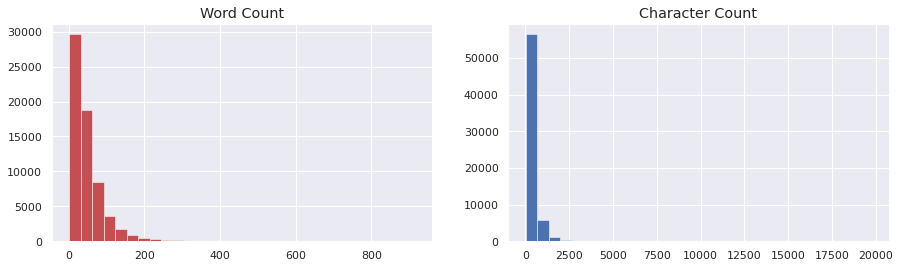

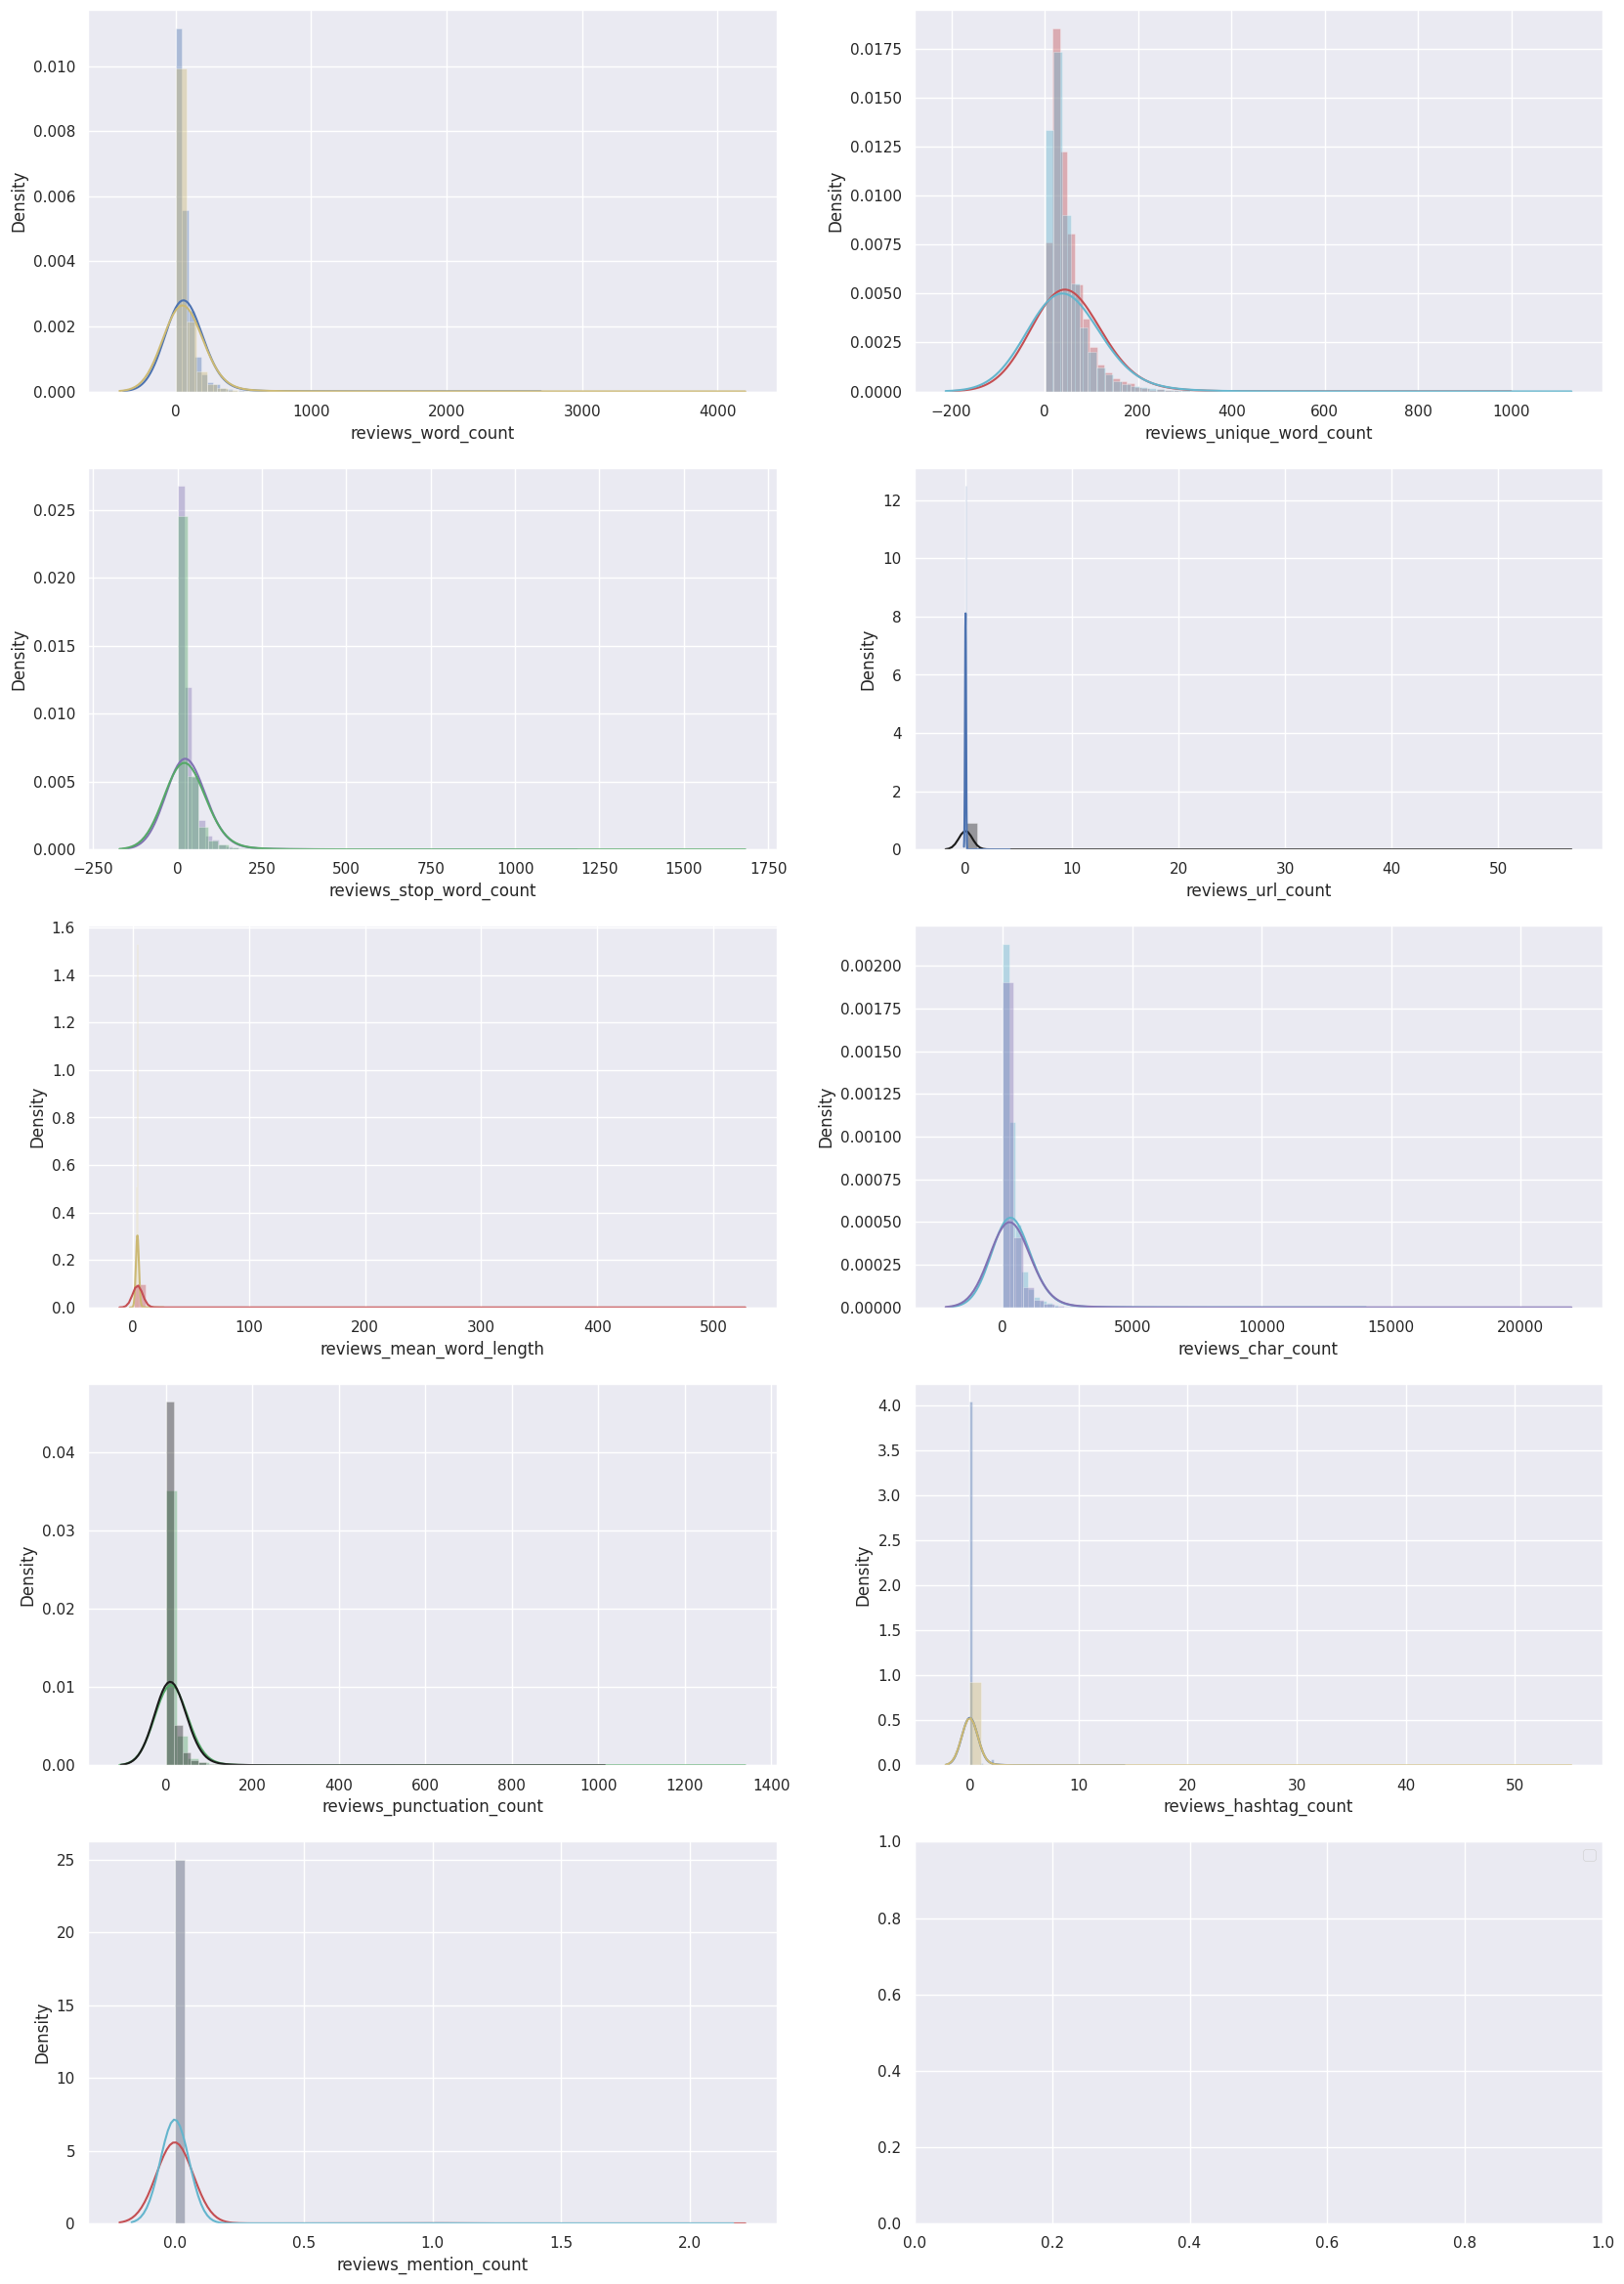

    Added 9 summary columns for counts of words and characters in each row
Cleaning text in Train data for reviews column
    Faster text processing using clean_text function, since top_num_features is below 300
    Time Taken for Expanding emojis and abbreviations in data = 8 seconds
        Time Taken for Processing text in data = 274 seconds
Train data Text cleaning completed. Time taken = 305 seconds

For target = target

    For class = 0
Top 200 n-grams
: ['do', 'but', 'work', 'use', 'product', 'would', 'buy', 'good', 'me', 'they', 'if', 'like', 'will', 'time', 'make', 'when', 'no', 'after', 'money', 'well', 'your', 'try', 'off', 'what', 'these', 'back', 'them', 'go', 'really', 'return', 'because', 'purchase', 'even', 'think', 'much', 'take', 'item', 'could', 'look', 'give', 'need', 'there', 'great', 'waste', 'small', 'come', 'day', 'find', 'first', 'order', 'thing', 'little', 'also', 'week', 'way', 'recommend', 'price', 'put', 'help', 'which', 'hard', 'cannot', 'bad', 'as', 'las

In [ ]:
nlp_transformer= Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
 modeltype='Classification',top_num_features=50, verbose=2,
 build_model=True)

## Making predictions

In [ ]:
nlp_transformer.predict(test[nlp_column])